## YOLOv8 학습 프로세스 (커스텀 데이터)

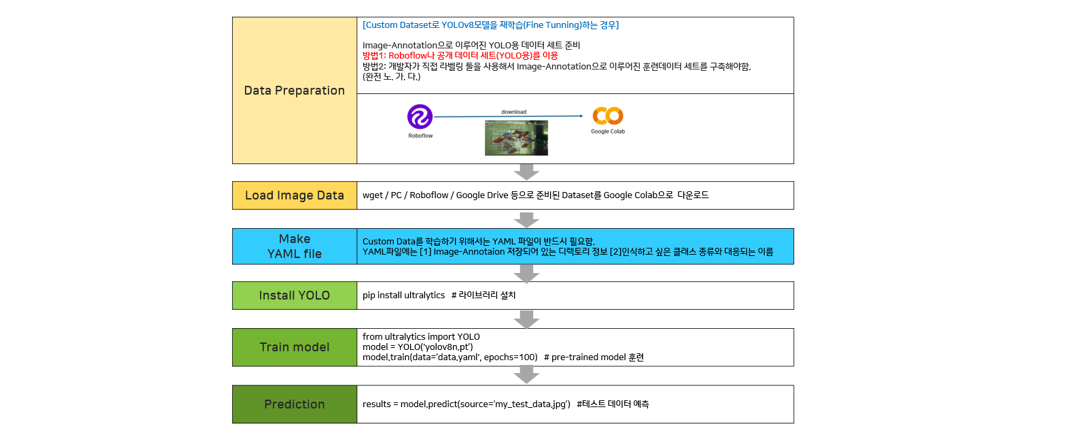

# 데이터세트 업로드

images_split.zip 파일을 /content 위치에 drag&drop하여 업로드한다.

In [1]:
%pwd

'/content'

In [2]:
!unzip /content/images_split.zip -d dataset/

Archive:  /content/images_split.zip
   creating: dataset/test/
   creating: dataset/train/
   creating: dataset/val/
  inflating: dataset/data.yaml       
   creating: dataset/train/images/
   creating: dataset/train/labels/
  inflating: dataset/train/labels/test_img_14.txt  
  inflating: dataset/train/labels/test_img_25.txt  
  inflating: dataset/train/labels/test_img_21.txt  
  inflating: dataset/train/labels/test_img_20.txt  
  inflating: dataset/train/labels/test_img_31.txt  
  inflating: dataset/train/labels/test_img_23.txt  
  inflating: dataset/train/labels/test_img_12.txt  
  inflating: dataset/train/labels/test_img_2.txt  
  inflating: dataset/train/labels/test_img_10.txt  
  inflating: dataset/train/labels/test_img_28.txt  
  inflating: dataset/train/labels/test_img_30.txt  
  inflating: dataset/train/labels/test_img_3.txt  
  inflating: dataset/train/labels/test_img_45.txt  
  inflating: dataset/train/labels/test_img_7.txt  
  inflating: dataset/train/labels/test_img_42.txt 

# yaml 파일 설정
* 데이터셋 위치 알려주는 config file

In [3]:
%cat /content/dataset/data.yaml

names: [0]
nc: 1
test: /home/mi/images_split/test
train: /home/mi/images_split/train
val: /home/mi/images_split/val


```
* train,val,test 경로가 나의 작업 환경과 맞지 않아 수정이 필요

* nc: name of class 객체 인식할 클래수 개수

* name: 클래스 이름


```

### custom data에 대한 yaml 파일 만들기

In [4]:
%pip install PyYAML # 파이썬에서 YAML 파일을 사용하기 위한 라이브러리

In [5]:
# train:에는 학습 이미지 절대경로
# val:에는 검증 이미지 절대경로
# nc:는 클래스 수 (여기서는 예시로 1개)
# names:는 클래스 이름

import yaml

data = { 'train' : '/content/dataset/train/images/',
         'val' : '/content/dataset/val/images/',
         'test' : '/content/dataset/test/images/',
         'names' : ['car'],
         'nc' : 1 } #detection 하고 싶은 클래스 개수

with open('/content/dataset/data.yaml', 'w') as f:  #저장
  yaml.dump(data, f)


In [6]:
!cat /content/dataset/data.yaml

names:
- car
nc: 1
test: /content/dataset/test/images/
train: /content/dataset/train/images/
val: /content/dataset/val/images/


# YOLOv8 설치

*  https://github.com/ultralytics/ultralytics

In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [8]:
import ultralytics

ultralytics.checks()

Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


# Train (Python version)

In [9]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # 사전 학습된 yolov8 나노 버전 모델 다운

# 다른 버전도 다운 받아서 시도.

100%|██████████| 6.25M/6.25M [00:00<00:00, 400MB/s]


In [10]:
print(type(model.names), len(model.names))

print(model.names) # MS COCO에서 정의된 클래스 개수와 종류 확인할 수 있음.(총 80개)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [ ]:
# /content/runs/이하의 폴더를 지우고 싶다면...

# !rm -rf /content/runs/

In [11]:
#훈련데이터 있는 위치 알려줌
#imgsz = 학습을 위한 목표 이미지 크기입니다.
#모든 이미지는 모델에 입력되기 전에 이 크기로 조정됩니다.
#모델 정확도와 계산 복잡도에 영향을 줍니다.

from ultralytics import YOLO

# 사전 학습된 모델 불러오기
model = YOLO('yolov8n.pt')  # yolov8n: Nano 모델 (가볍고 빠름)

# 학습 시작
model.train(
    data='/content/dataset/data.yaml',  # 아까 만든 data.yaml 파일
    epochs=100,         # 학습 횟수 (조정 가능)
    imgsz=640,         # 입력 이미지 크기 (640 권장)
    batch=16,          # 배치 사이즈 (GPU 메모리에 따라 조정)
    patience=20,       # 조기 종료 기준 (val loss 향상 없을 때)
    name='train',  # 결과 저장 폴더 이름
    pretrained=True,    # COCO 사전학습된 가중치로 초기화
    augment=True          # 데이터 증강 활성화
)



Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

100%|██████████| 755k/755k [00:00<00:00, 147MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 308MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 117.3±197.1 MB/s, size: 51.4 KB)


train: Scanning /content/dataset/train/labels... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<00:00, 929.23it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 18.7±8.7 MB/s, size: 48.4 KB)


val: Scanning /content/dataset/val/labels... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<00:00, 592.45it/s]

val: New cache created: /content/dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.99G     0.9845      3.188     0.9768         31        640: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all          9          9    0.00333          1      0.423      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      2/100         2G     0.8955      3.239     0.9545         29        640: 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all          9          9    0.00333          1      0.411      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.03G     0.9013      3.136     0.9496         35        640: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all          9          9    0.00333          1      0.863      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.04G     0.6839      2.868     0.8764         25        640: 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all          9          9    0.00333          1      0.995      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.06G     0.8278      2.395      0.875         30        640: 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all          9          9    0.00333          1      0.995      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.08G     0.7628      1.629     0.9534         25        640: 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all          9          9      0.943          1      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.1G     0.7458       1.56     0.9006         18        640: 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all          9          9          1      0.955      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.11G      0.814      1.275     0.8896         36        640: 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all          9          9          1       0.96      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.13G     0.7438       1.23     0.8353         27        640: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all          9          9          1      0.935      0.995      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.15G     0.8308      1.364     0.9191         23        640: 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all          9          9          1      0.838      0.995      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.17G     0.7359      1.249     0.8652         28        640: 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all          9          9          1       0.58      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.19G     0.7333      1.264     0.8802         22        640: 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]

                   all          9          9          1      0.693      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.2G     0.7307      1.261     0.8851         31        640: 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]


                   all          9          9          1      0.825      0.995      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.22G     0.7036      1.156     0.8771         31        640: 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]

                   all          9          9          1      0.612      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.24G     0.6812      1.256     0.9329         25        640: 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all          9          9          1      0.456      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.25G     0.7336      1.214      0.952         29        640: 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all          9          9          1      0.327      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.27G     0.6543       1.27     0.9001         21        640: 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all          9          9          1      0.362      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.29G     0.7026      1.199     0.9232         27        640: 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all          9          9          1      0.794      0.984      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.3G     0.7024      1.147     0.9329         24        640: 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all          9          9          1      0.849      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.32G     0.6128      1.062     0.8749         29        640: 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all          9          9          1      0.873      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.34G     0.6298      1.135      0.893         29        640: 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all          9          9          1      0.879      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.36G     0.6597      1.066     0.8954         39        640: 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all          9          9          1      0.859      0.984      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.37G     0.7507       1.16     0.9337         30        640: 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all          9          9          1      0.833      0.984      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.39G     0.7147      1.038     0.9021         31        640: 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]


                   all          9          9          1      0.807      0.984      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.41G     0.6358      1.088     0.8547         30        640: 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all          9          9          1      0.725      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.43G      0.768     0.9854     0.9612         34        640: 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all          9          9          1      0.328      0.886       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.44G     0.7223      1.298     0.9275         30        640: 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]

                   all          9          9          1      0.409      0.886      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.46G     0.7226      1.063     0.9088         29        640: 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all          9          9          1      0.409      0.886      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.48G     0.7168      1.067     0.9228         31        640: 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all          9          9          1      0.634      0.844      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.5G     0.7624      1.083     0.8927         26        640: 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all          9          9          1      0.518      0.778      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.51G     0.6887     0.9976     0.9027         29        640: 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all          9          9          1      0.518      0.778      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.53G     0.7416      1.012     0.9534         30        640: 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all          9          9          1      0.299      0.576      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.55G     0.7781      1.123     0.9879         23        640: 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.09it/s]

                   all          9          9          1      0.209      0.435      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.56G     0.6868      1.025     0.8997         31        640: 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all          9          9          1      0.209      0.435      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.58G     0.6696      1.075     0.9063         20        640: 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all          9          9          1      0.435      0.889      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.6G     0.7285      1.032     0.9094         27        640: 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


                   all          9          9          1      0.788      0.995      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.62G     0.6534      1.018     0.9156         29        640: 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all          9          9          1      0.788      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.63G     0.6938      1.026     0.9471         27        640: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all          9          9          1      0.835      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.65G     0.6438     0.9127     0.8824         31        640: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all          9          9          1      0.595      0.995      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.67G     0.6533      1.021     0.8924         27        640: 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all          9          9          1      0.595      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.68G     0.6193     0.8961     0.8815         29        640: 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all          9          9          1      0.431      0.995      0.778
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 21, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



41 epochs completed in 0.011 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]


                   all          9          9          1      0.564      0.995      0.764
Speed: 0.2ms preprocess, 18.3ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b984c43bc50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

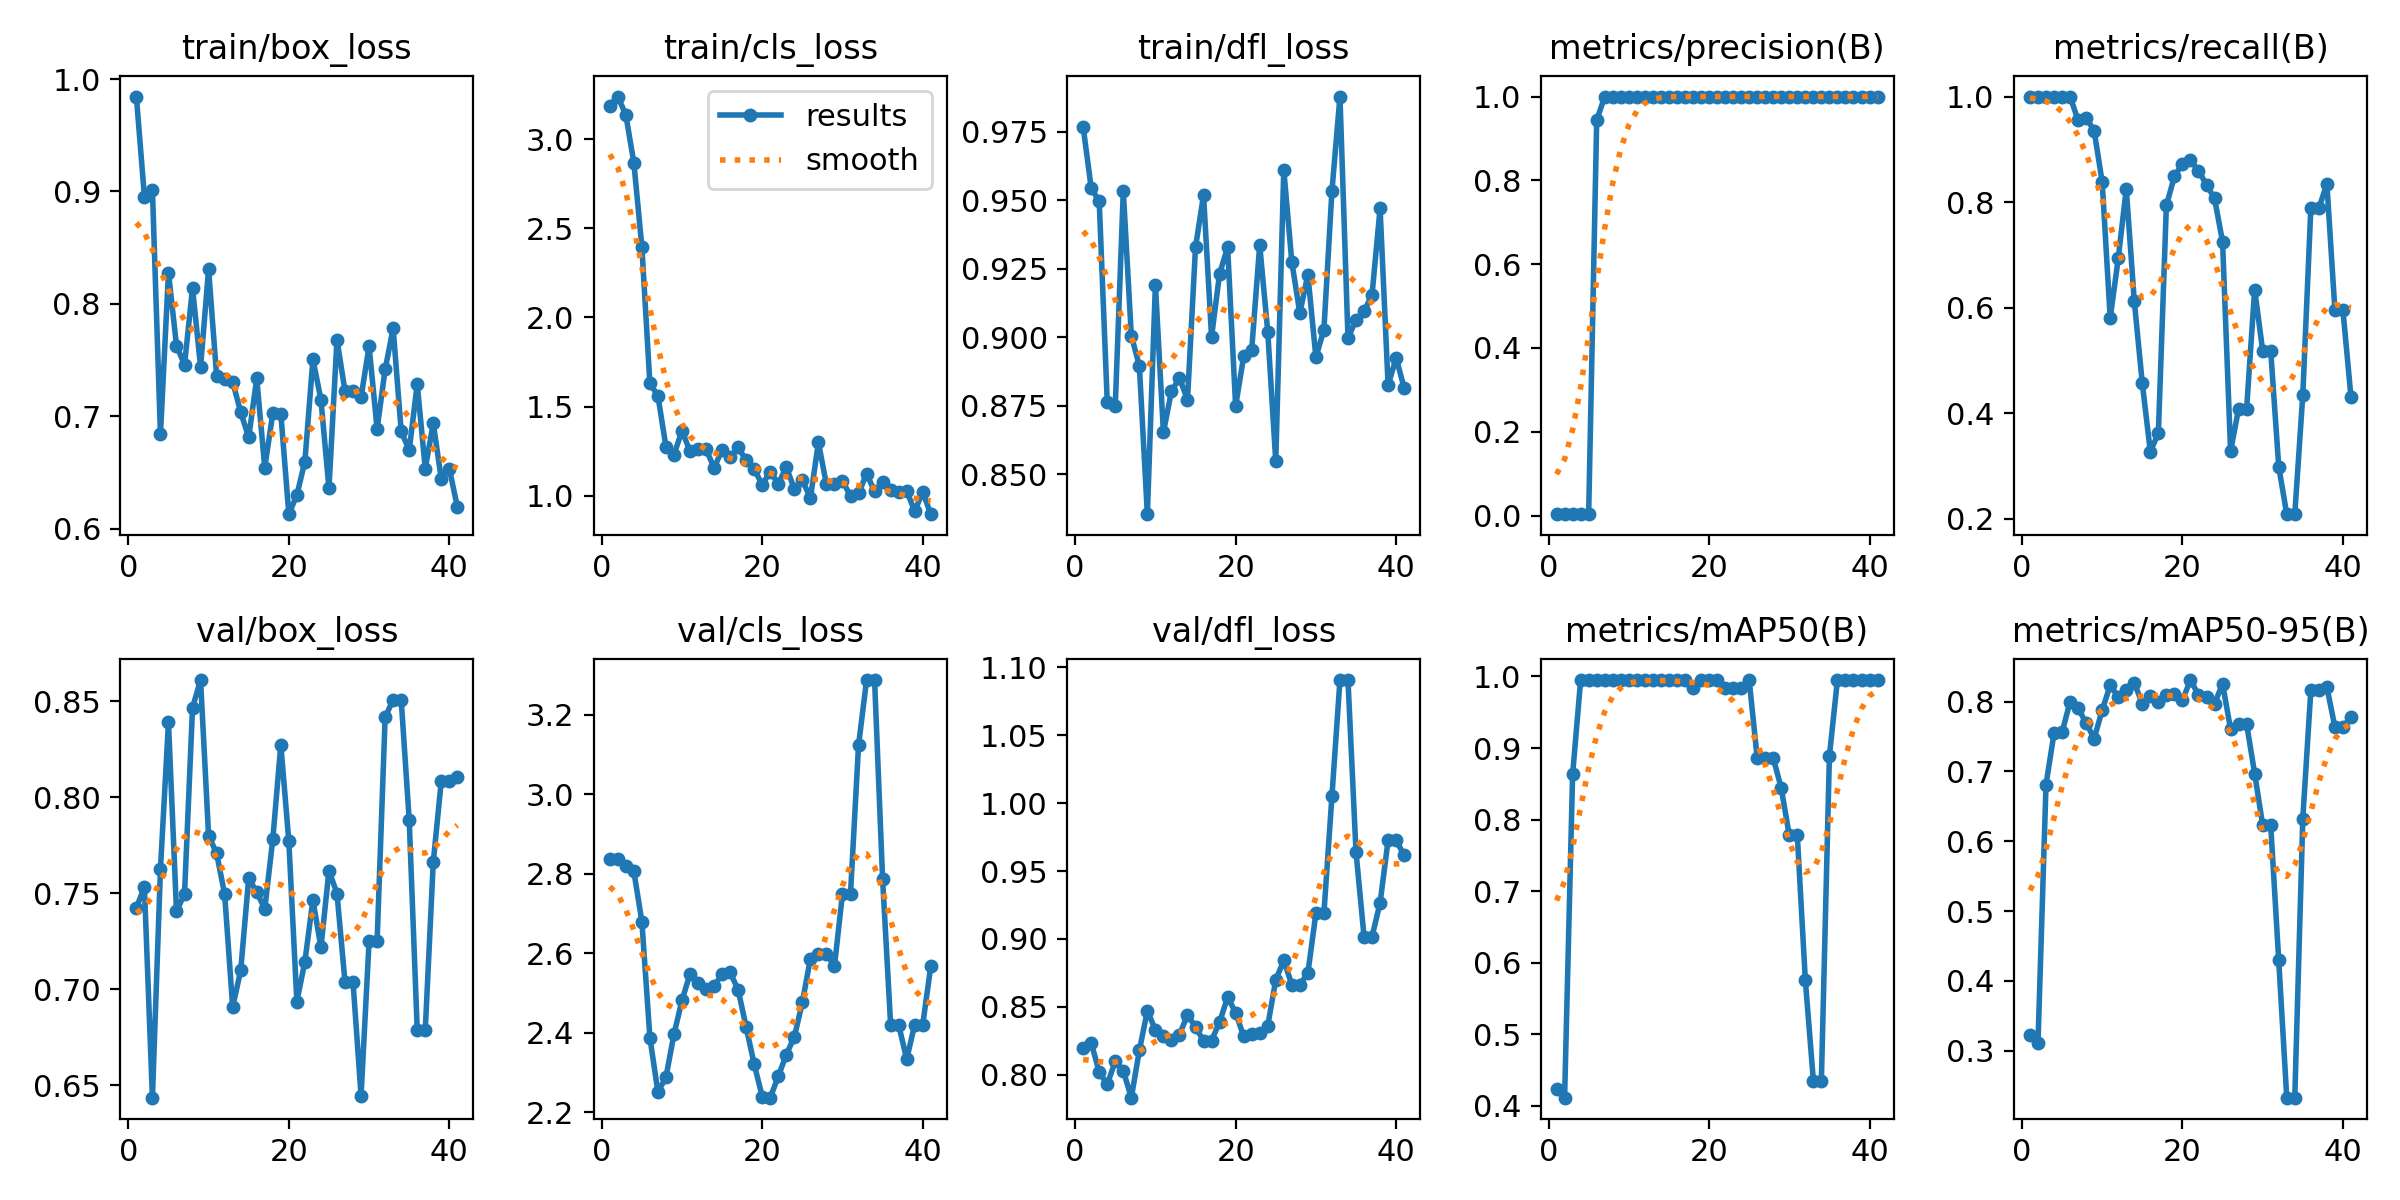

In [12]:
from IPython.display import display, Image
Image(filename='/content/runs/detect/train/results.png', width=1000)

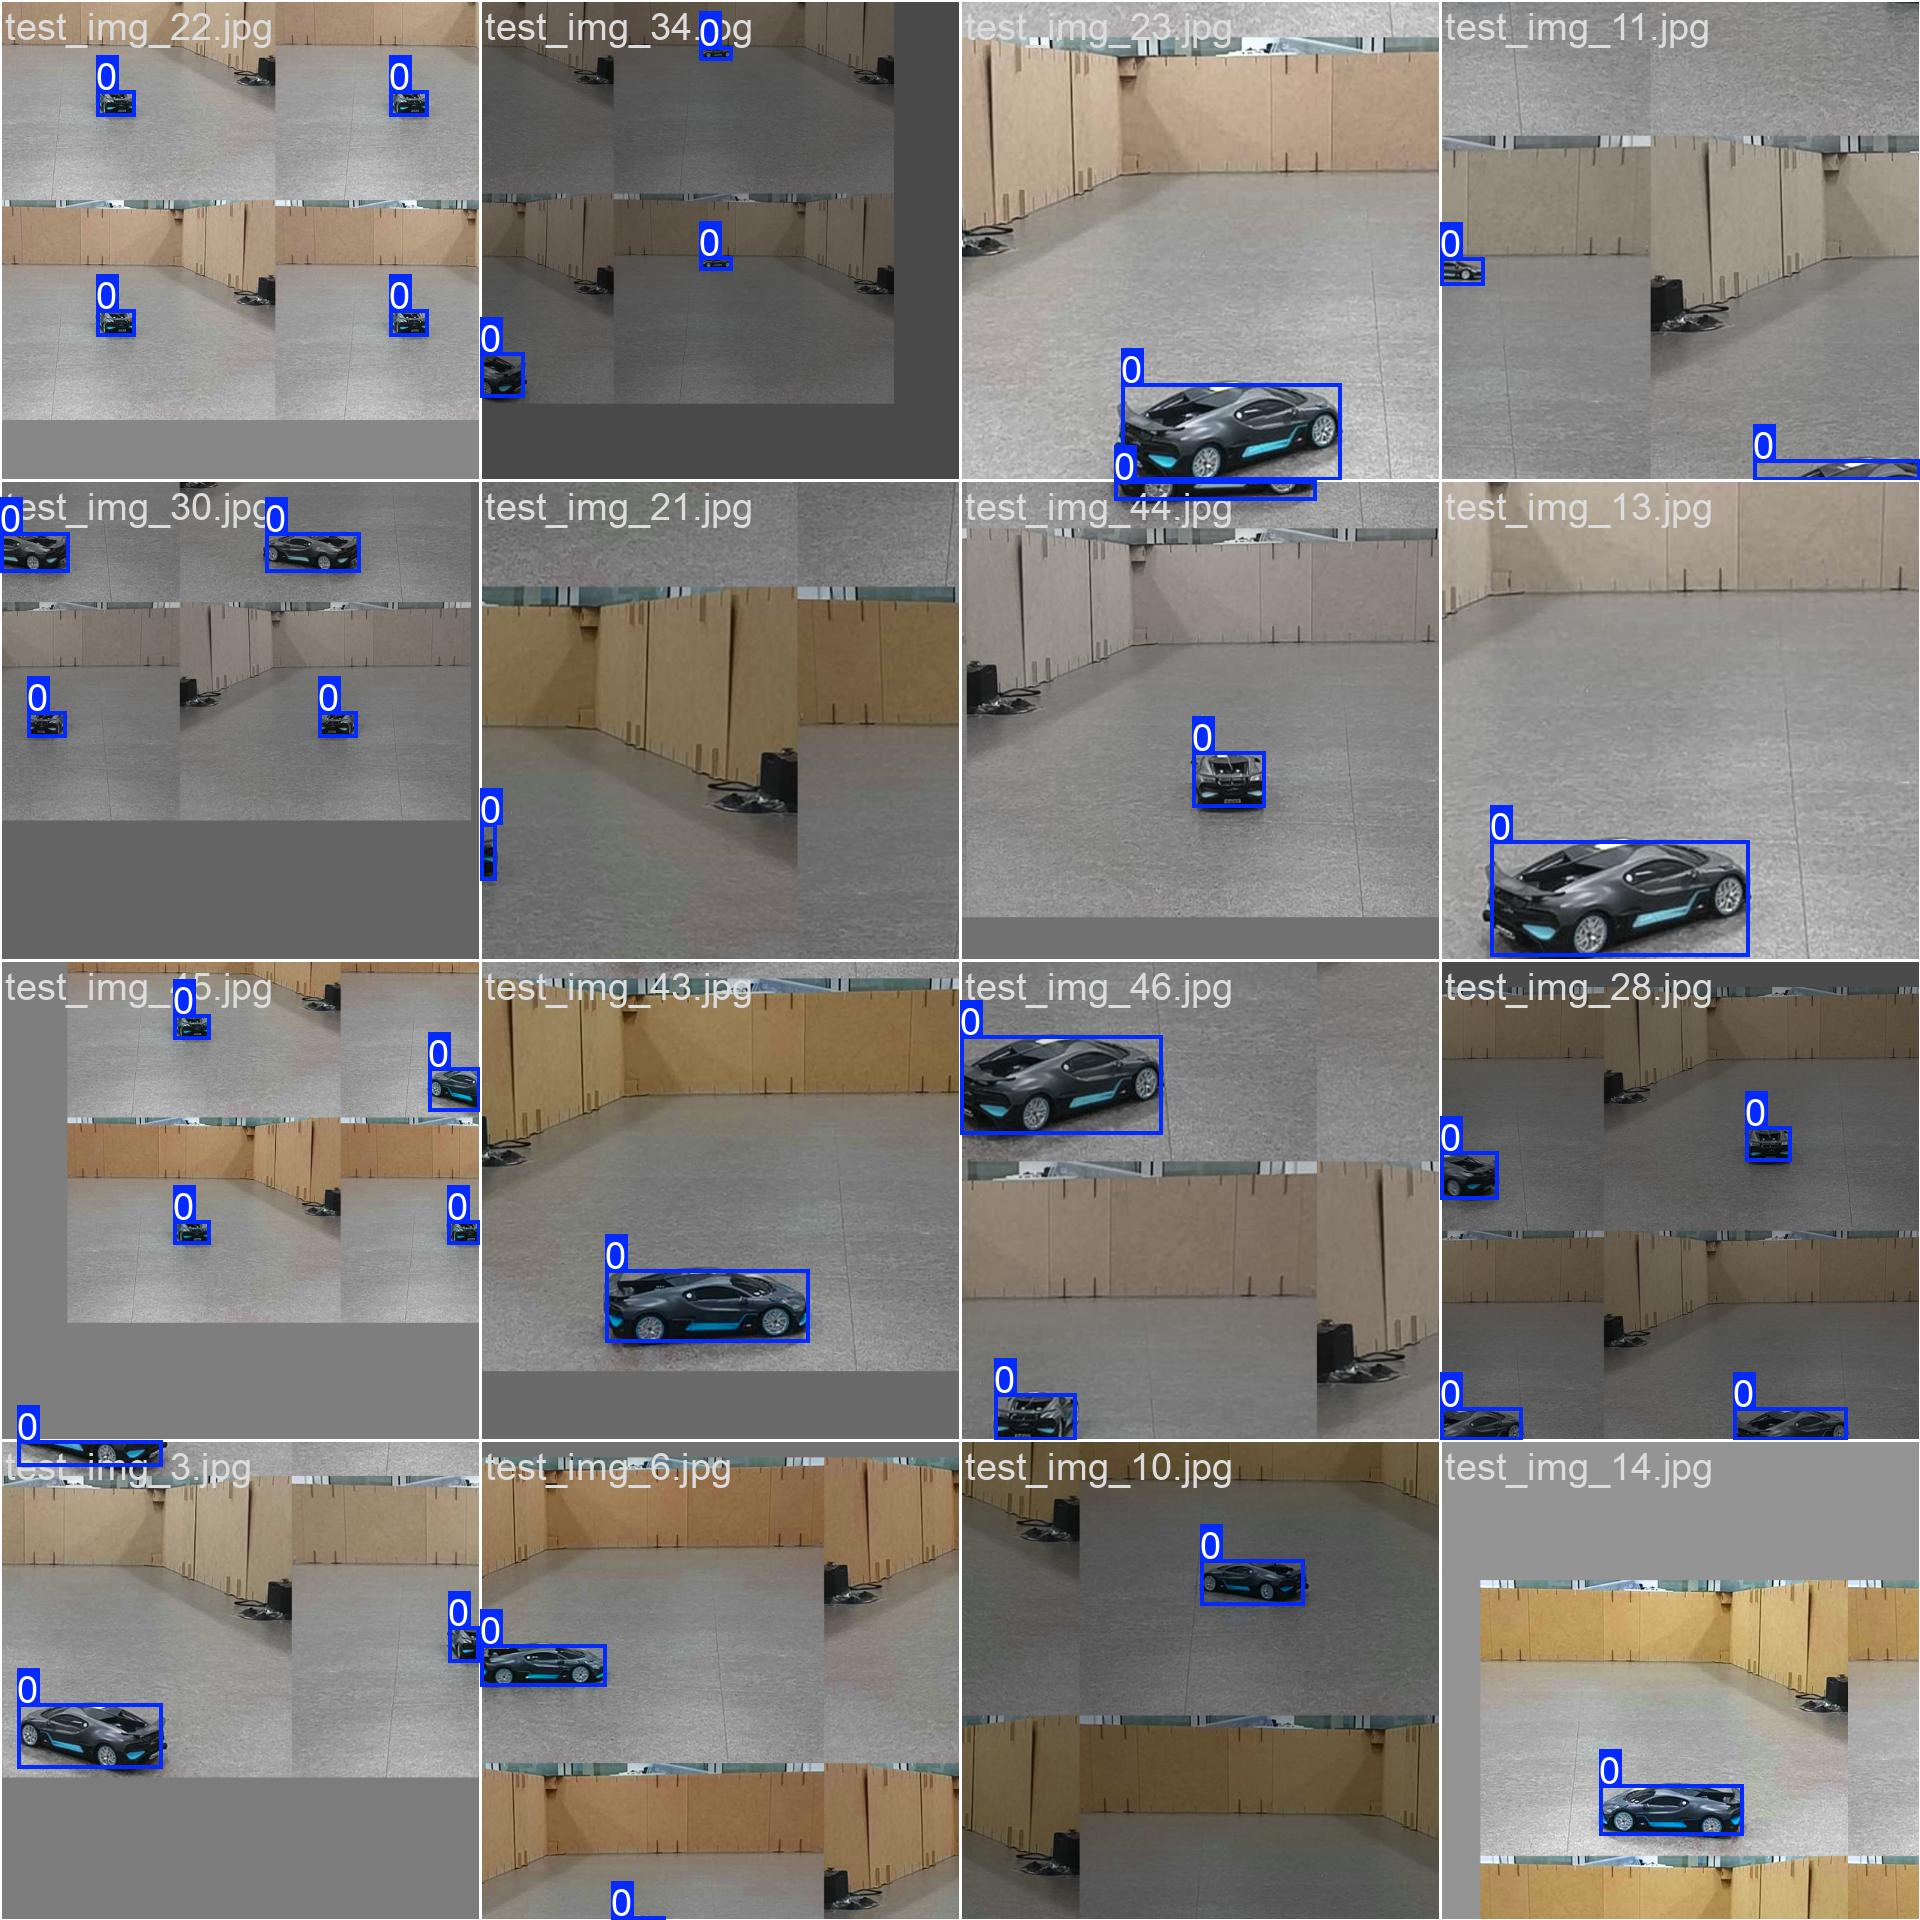

In [14]:
Image(filename='/content/runs/detect/train/train_batch0.jpg', width=600)

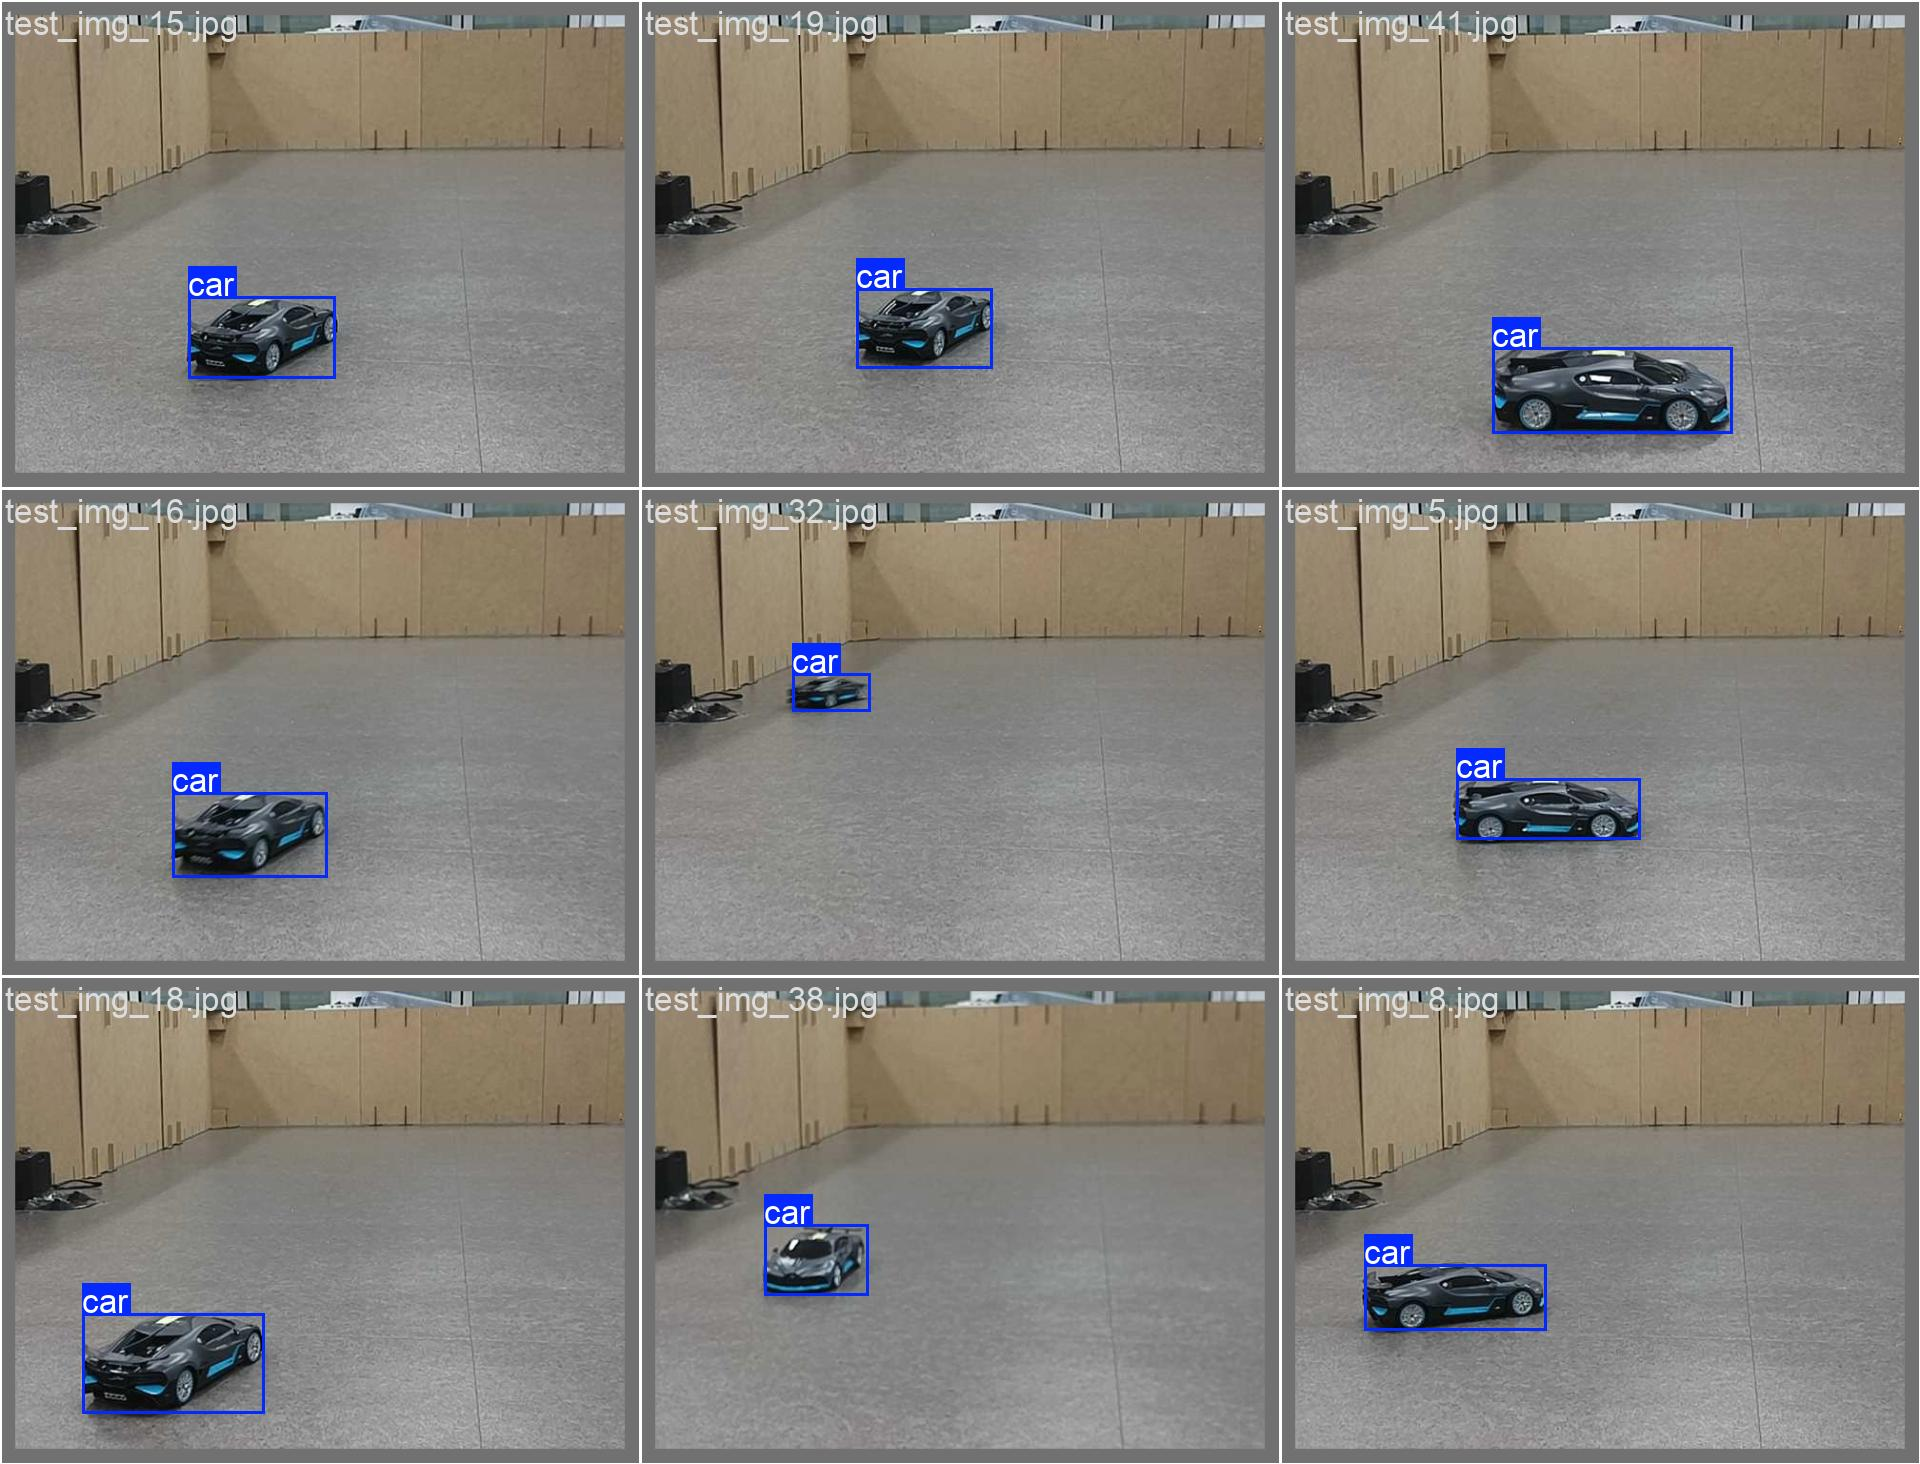

In [15]:
Image(filename='/content/runs/detect/train/val_batch0_labels.jpg', width=600)

```
train 과정중에 loss, accuracy 등의 graph 데이터는 runs/detect/train/ 에 있는 results.csv 와 results.png 통해서 확인가능하다
```

# Custom Model Inference Test

In [ ]:
!rm -rf /content/runs/detect/predict

In [16]:
# model = YOLO('/content/runs/detect/train/weights/best.pt')
model = YOLO('/content/runs/detect/train/weights/best.pt')


In [17]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 1
{0: 'car'}


# 테스트 이미지 데이터 생성 및 확인

In [18]:
# 테스트 이미지

from glob import glob

test_image_list = glob('/content/dataset/test/images/*')

print(len(test_image_list))

test_image_list.sort()

for i in range(len(test_image_list)):

    print('i = ',i, test_image_list[i])

4
i =  0 /content/dataset/test/images/test_img_27.jpg
i =  1 /content/dataset/test/images/test_img_29.jpg
i =  2 /content/dataset/test/images/test_img_4.jpg
i =  3 /content/dataset/test/images/test_img_9.jpg


# 이미지내의 객체 검출 (Inference)

In [19]:
results = model.predict(source='/content/dataset/test/images/', save=True, conf=0.1)


image 1/4 /content/dataset/test/images/test_img_27.jpg: 480x640 1 car, 40.4ms
image 2/4 /content/dataset/test/images/test_img_29.jpg: 480x640 1 car, 8.1ms
image 3/4 /content/dataset/test/images/test_img_4.jpg: 480x640 1 car, 6.7ms
image 4/4 /content/dataset/test/images/test_img_9.jpg: 480x640 1 car, 6.9ms
Speed: 1.7ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


In [20]:
print(type(results), len(results))

<class 'list'> 4


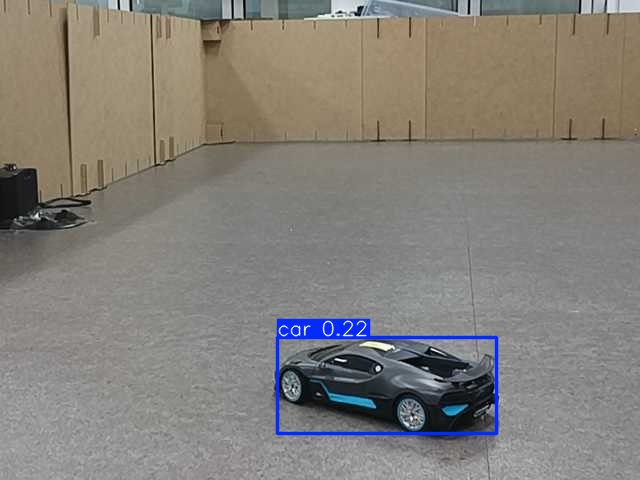

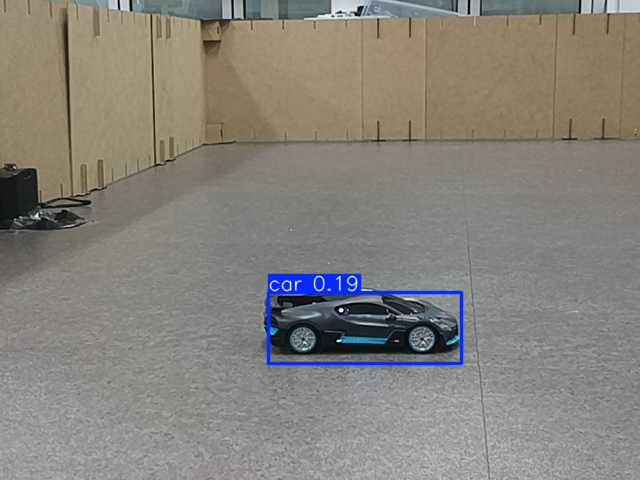

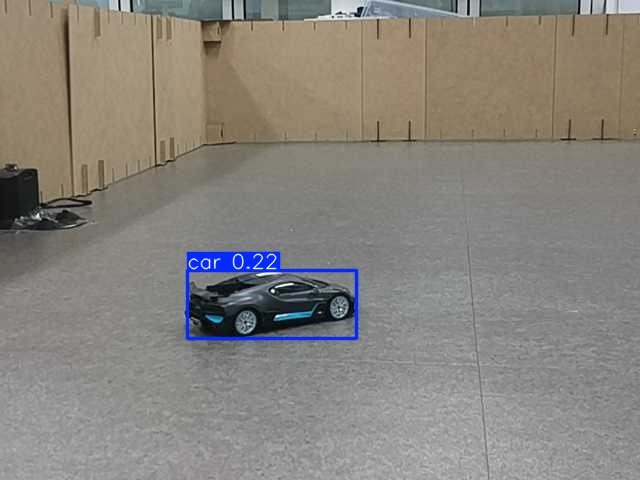

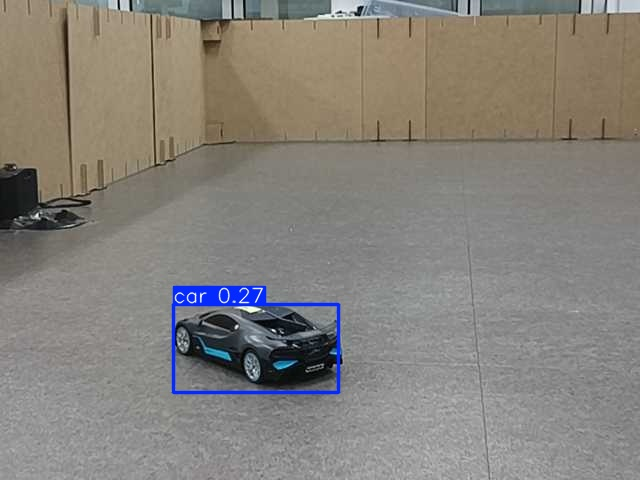

In [21]:
import cv2
from google.colab.patches import cv2_imshow

image_paths = glob('/content/runs/detect/predict/*.jpg')

for image_path in image_paths:
    img = cv2.imread(image_path)
    cv2_imshow(img)

# 다운로드

In [22]:
from google.colab import files

# 다운로드할 파일 경로
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>